In [3]:
!pwd

/teamspace/studios/this_studio/diffusion-augmented-pixelsplat/controlnet


In [1]:
%cd diffusion-augmented-pixelsplat/controlnet/

/teamspace/studios/this_studio/diffusion-augmented-pixelsplat/controlnet


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# !accelerate launch train_controlnet.py \
#  --pretrained_model_name_or_path="stabilityai/stable-diffusion-2-1-base" \
#  --output_dir="diffusion_model_out" \
#  --dataset_name="Wouter01/re10ksmalltrainn" \
#  --conditioning_image_column=conditioning_image \
#  --image_column=ground_truth_image \
#  --caption_column=prompt \
#  --resolution=256 \
#  --learning_rate=1e-3 \
#  --validation_image "./incorrect_img1.jpeg" "./incorrect_img1.jpeg" \
#  --validation_prompt "" \
#  --train_batch_size=4 \
#  --num_train_epochs=1500 \
#  --tracker_project_name="controlnet" \
#  --enable_xformers_memory_efficient_attention \
#  --checkpointing_steps=100 \
#  --validation_steps=1 \
#  --report_to wandb \
#  --push_to_hub

In [4]:
# Documentation:        
        # Args:
        #     prompt (`str` or `List[str]`, *optional*):
        #         The prompt or prompts to guide image generation. If not defined, you need to pass `prompt_embeds`.
        #     image (`torch.FloatTensor`, `PIL.Image.Image`, `np.ndarray`, `List[torch.FloatTensor]`, `List[PIL.Image.Image]`, `List[np.ndarray]`,:
        #             `List[List[torch.FloatTensor]]`, `List[List[np.ndarray]]` or `List[List[PIL.Image.Image]]`):
        #         The ControlNet input condition to provide guidance to the `unet` for generation. If the type is
        #         specified as `torch.FloatTensor`, it is passed to ControlNet as is. `PIL.Image.Image` can also be
        #         accepted as an image. The dimensions of the output image defaults to `image`'s dimensions. If height
        #         and/or width are passed, `image` is resized accordingly. If multiple ControlNets are specified in
        #         `init`, images must be passed as a list such that each element of the list can be correctly batched for
        #         input to a single ControlNet. When `prompt` is a list, and if a list of images is passed for a single
        #         ControlNet, each will be paired with each prompt in the `prompt` list. This also applies to multiple
        #         ControlNets, where a list of image lists can be passed to batch for each prompt and each ControlNet.
        #     height (`int`, *optional*, defaults to `self.unet.config.sample_size * self.vae_scale_factor`):
        #         The height in pixels of the generated image.
        #     width (`int`, *optional*, defaults to `self.unet.config.sample_size * self.vae_scale_factor`):
        #         The width in pixels of the generated image.
        #     num_inference_steps (`int`, *optional*, defaults to 50):
        #         The number of denoising steps. More denoising steps usually lead to a higher quality image at the
        #         expense of slower inference.
        # control_image (`torch.FloatTensor`, `PIL.Image.Image`, `np.ndarray`, `List[torch.FloatTensor]`, `List[PIL.Image.Image]`, `List[np.ndarray]`,:
        #             `List[List[torch.FloatTensor]]`, `List[List[np.ndarray]]` or `List[List[PIL.Image.Image]]`):
        #         The ControlNet input condition to provide guidance to the `unet` for generation. If the type is
        #         specified as `torch.FloatTensor`, it is passed to ControlNet as is. `PIL.Image.Image` can also be
        #         accepted as an image. The dimensions of the output image defaults to `image`'s dimensions. If height
        #         and/or width are passed, `image` is resized accordingly. If multiple ControlNets are specified in
        #         `init`, images must be passed as a list such that each element of the list can be correctly batched for
        #         input to a single ControlNet.

        #     strength (`float`, *optional*, defaults to 0.8):
        #         Indicates extent to transform the reference `image`. Must be between 0 and 1. `image` is used as a
        #         starting point and more noise is added the higher the `strength`. The number of denoising steps depends
        #         on the amount of noise initially added. When `strength` is 1, added noise is maximum and the denoising
        #         process runs for the full number of iterations specified in `num_inference_steps`. A value of 1
        #         essentially ignores `image`.

        #     guidance_scale (`float`, *optional*, defaults to 7.5):
        #         A higher guidance scale value encourages the model to generate images closely linked to the text
        #         `prompt` at the expense of lower image quality. Guidance scale is enabled when `guidance_scale > 1`.
        #     negative_prompt (`str` or `List[str]`, *optional*):
        #         The prompt or prompts to guide what to not include in image generation. If not defined, you need to
        #         pass `negative_prompt_embeds` instead. Ignored when not using guidance (`guidance_scale < 1`).
        #     num_images_per_prompt (`int`, *optional*, defaults to 1):
        #         The number of images to generate per prompt.
        #     eta (`float`, *optional*, defaults to 0.0):
        #         Corresponds to parameter eta (η) from the [DDIM](https://arxiv.org/abs/2010.02502) paper. Only applies
        #         to the [`~schedulers.DDIMScheduler`], and is ignored in other schedulers.
        #     generator (`torch.Generator` or `List[torch.Generator]`, *optional*):
        #         A [`torch.Generator`](https://pytorch.org/docs/stable/generated/torch.Generator.html) to make
        #         generation deterministic.
        #     latents (`torch.FloatTensor`, *optional*):
        #         Pre-generated noisy latents sampled from a Gaussian distribution, to be used as inputs for image
        #         generation. Can be used to tweak the same generation with different prompts. If not provided, a latents
        #         tensor is generated by sampling using the supplied random `generator`.
        #     prompt_embeds (`torch.FloatTensor`, *optional*):
        #         Pre-generated text embeddings. Can be used to easily tweak text inputs (prompt weighting). If not
        #         provided, text embeddings are generated from the `prompt` input argument.
        #     output_type (`str`, *optional*, defaults to `"pil"`):
        #         The output format of the generated image. Choose between `PIL.Image` or `np.array`.
        #     return_dict (`bool`, *optional*, defaults to `True`):
        #         Whether or not to return a [`~pipelines.stable_diffusion.StableDiffusionPipelineOutput`] instead of a
        #         plain tuple.
        #     callback (`Callable`, *optional*):
        #         A function that calls every `callback_steps` steps during inference. The function is called with the
        #         following arguments: `callback(step: int, timestep: int, latents: torch.FloatTensor)`.
        #     callback_steps (`int`, *optional*, defaults to 1):
        #         The frequency at which the `callback` function is called. If not specified, the callback is called at
        #         every step.
        #     cross_attention_kwargs (`dict`, *optional*):
        #         A kwargs dictionary that if specified is passed along to the [`AttentionProcessor`] as defined in
        #         [`self.processor`](https://github.com/huggingface/diffusers/blob/main/src/diffusers/models/attention_processor.py).
        #     controlnet_conditioning_scale (`float` or `List[float]`, *optional*, defaults to 1.0):
        #         The outputs of the ControlNet are multiplied by `controlnet_conditioning_scale` before they are added
        #         to the residual in the original `unet`. If multiple ControlNets are specified in `init`, you can set
        #         the corresponding scale as a list.
        #     control_guidance_start (`float` or `List[float]`, *optional*, defaults to 0.0):
        #         The percentage of total steps at which the ControlNet starts applying.
        #     control_guidance_end (`float` or `List[float]`, *optional*, defaults to 1.0):
        #         The percentage of total steps at which the ControlNet stops applying.


        # Examples:

        # Returns:
        #     [`~pipelines.stable_diffusion.StableDiffusionPipelineOutput`] or `tuple`:
        #         If `return_dict` is `True`, [`~pipelines.stable_diffusion.StableDiffusionPipelineOutput`] is returned,
        #         otherwise a `tuple` is returned where the first element is a list with the generated images and the
        #         second element is a list of `bool`s indicating whether the corresponding generated image contains
        #         "not-safe-for-work" (nsfw) content.
        # """

In [5]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
import torch

# TODO here is the first choice that matters, which datatype do we use
# These should match

controlnet = ControlNetModel.from_pretrained(
    "/teamspace/studios/this_studio/diffusion-augmented-pixelsplat/controlnet/snellius/checkpoint-50000/controlnet",
    requires_safety_checker=True,
    # torch_dtype=torch.float32,
    )
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1-base", controlnet=controlnet,
    #  torch_dtype=torch.float32
)
pipeline_name = "sd21_small_test_image_controlnet"

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.to("cuda")

# prompt = "The same image but fixing small physical and illumination inconsistencies"
prompt = ""

OSError: We couldn't connect to 'https://huggingface.co' to load this model, couldn't find it in the cached files and it looks like /teamspace/studios/this_studio/diffusion-augmented-pixelsplat/controlnet/snellius/checkpoint-50000/controlnet is not the path to a directory containing a config.json file.
Checkout your internet connection or see how to run the library in offline mode at 'https://huggingface.co/docs/diffusers/installation#offline-mode'.

In [1]:
from diffusers import ControlNetModel, StableDiffusionControlNetPipeline

controlnet = ControlNetModel.from_pretrained("Wouter01/really_good_diffusion_model_out")
pipeline = StableDiffusionControlNetPipeline.from_pretrained(
	"stabilityai/stable-diffusion-2-1-base", controlnet=controlnet
)
pipeline_name = "sd21_small_test_image_controlnet"
pipeline.to("cuda")

# prompt = "The same image but fixing small physical and illumination inconsistencies"
prompt = ""

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [2]:
# from diffusers import ControlNetModel, StableDiffusionControlNetPipeline

# controlnet = ControlNetModel.from_pretrained("Wouter01/diffusion_re10k_hard")
# pipeline = StableDiffusionControlNetPipeline.from_pretrained(
# 	"stabilityai/stable-diffusion-2-1-base", controlnet=controlnet
# )
# pipeline_name = "sd21_small_test_image_controlnet"
# pipeline.to("cuda")

# # prompt = "The same image but fixing small physical and illumination inconsistencies"
# prompt = ""

config.json:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.46G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

torch.Size([3, 256, 256])


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

torch.Size([3, 256, 256])


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

torch.Size([3, 256, 256])


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

pixelsplat SSI: 0.80094981110047
reconstructed w SSI: 0.6253285821046594
reconstructed wo SSI: 0.5480135075584717
pixelsplat SSI: 0.711475904857438
reconstructed w SSI: 0.37826740376637497
reconstructed wo SSI: 0.5748506605720495
pixelsplat SSI: 0.4654567607708456
reconstructed w SSI: 0.3715379986252198
reconstructed wo SSI: 0.41883318861449026


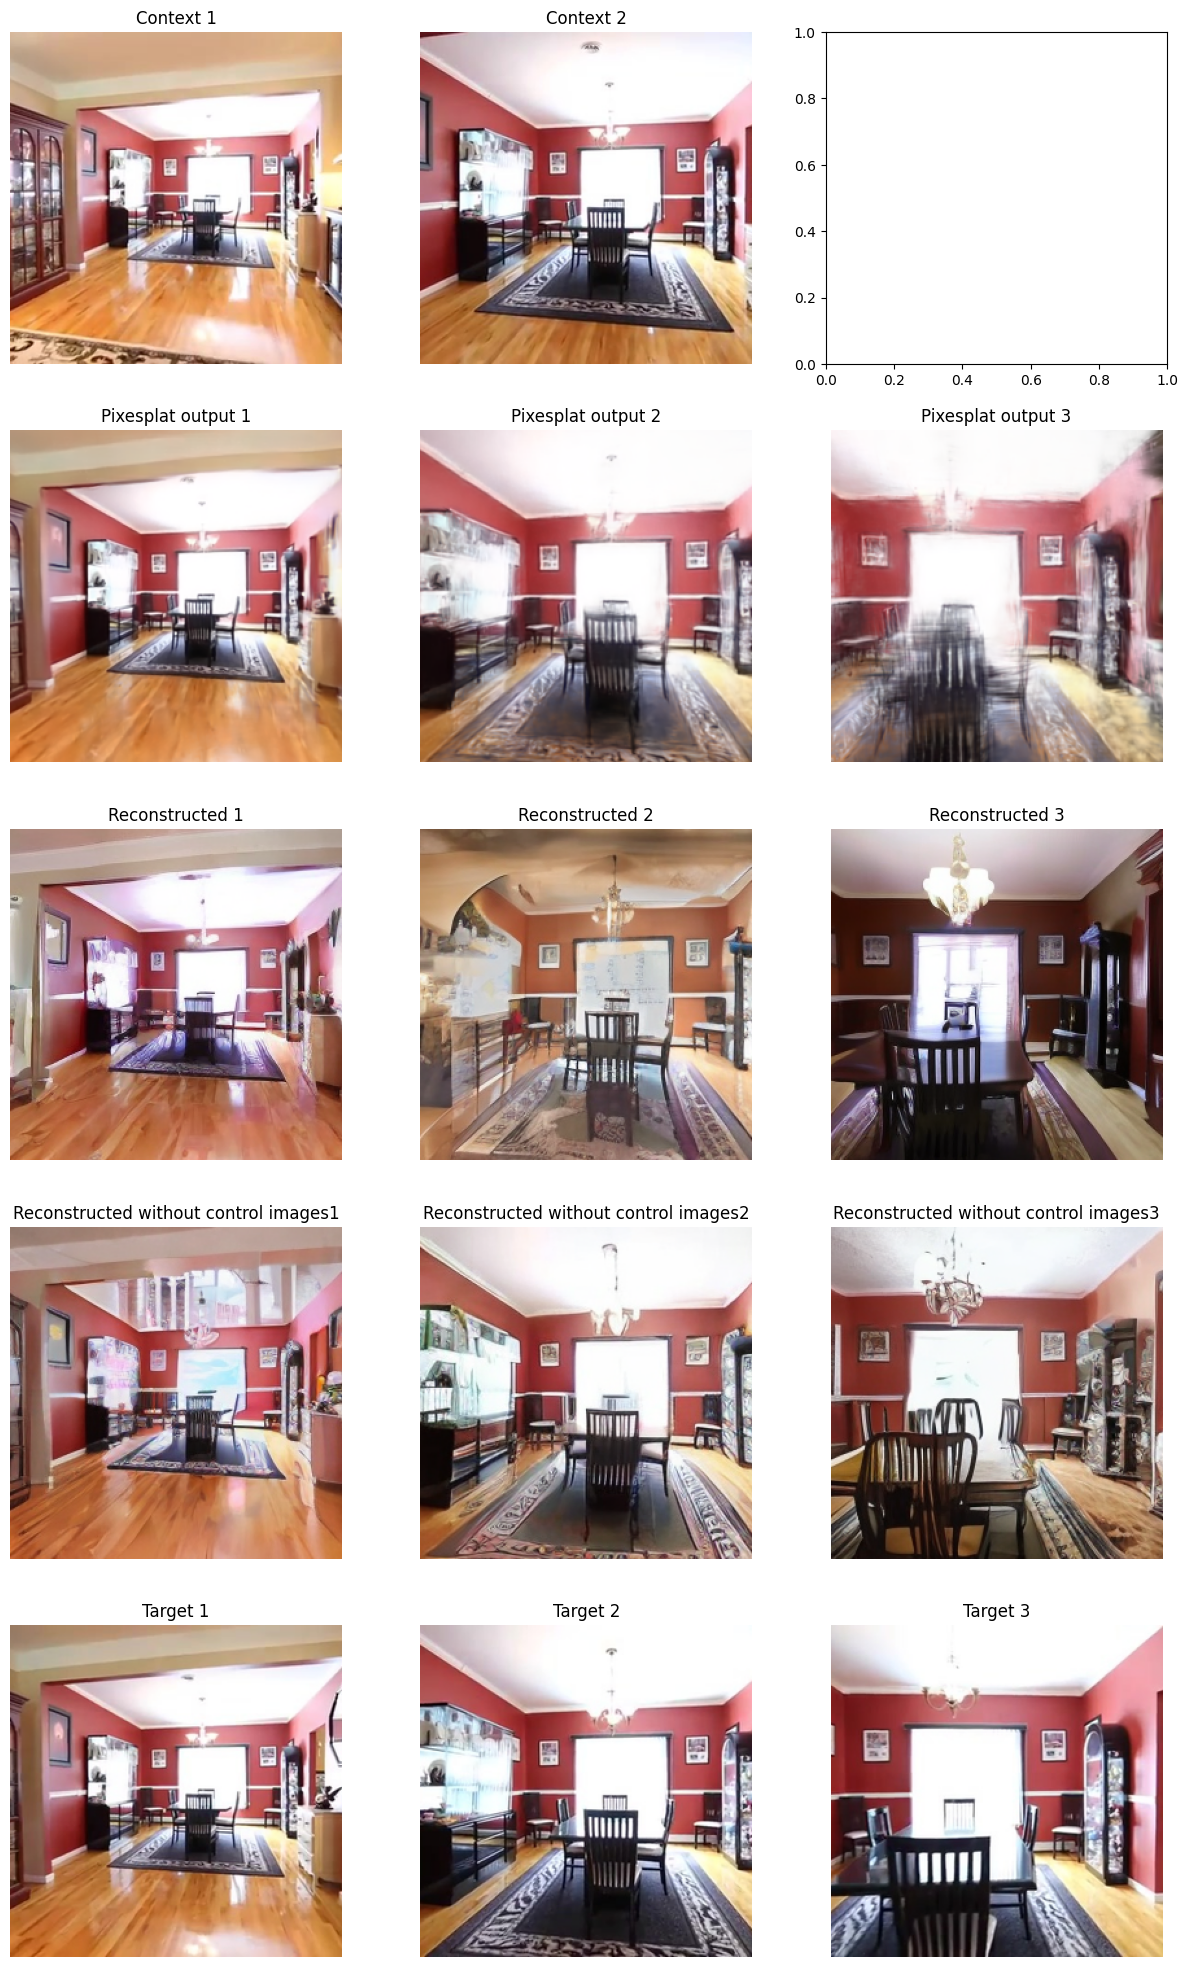

In [10]:
from pathlib import Path 
from tqdm.autonotebook import tqdm
import hashlib
from diffusers import AutoPipelineForInpainting, StableDiffusionInpaintPipeline
import torch
from PIL import Image
from pathlib import Path
import os
import numpy as np
import math
from diffusers.utils import load_image, make_image_grid
from tqdm.autonotebook import tqdm
import matplotlib.pyplot as plt
from matplotlib import interactive
%matplotlib inline
from skimage.metrics import structural_similarity
import torchvision.transforms as transforms


transform = transforms.ToTensor()

prompt = ""
# Device cpu or cuda give major difference, also make sure you are not overfitting to the seed
generator = torch.Generator(device="cuda")  #.manual_seed(33)

main_folder = "/teamspace/studios/this_studio/diffusion-augmented-pixelsplat/outputs/re10k_test_data/re10k/"
for sample_folder in os.listdir(main_folder)[0:]:
    sample_path = os.path.join(main_folder, sample_folder)
    
    # Check if it's a directory
    if os.path.isdir(sample_path):
        
        context_folder = os.path.join(sample_path, "context")
        color_folder = os.path.join(sample_path, "color")
        target_folder = os.path.join(sample_path, "target")
       
        # Get the list of image files in each folder
        context_images = [os.path.join(context_folder, img) for img in os.listdir(context_folder) if img.endswith(".png")]
        color_images = [os.path.join(color_folder, img) for img in os.listdir(color_folder) if img.endswith(".png")]
        target_images = [os.path.join(target_folder, img) for img in os.listdir(target_folder) if img.endswith(".png")]
        
        
        # Display context images
        for _ in range(1):
            # Display images using matplotlib
            fig, axes = plt.subplots(5, 3, figsize=(15, 25))
            axes = axes.flatten()

            for i, img_path in enumerate(context_images):
                if i < 3:
                    context_image = Image.open(img_path)
                    axes[i].imshow(context_image)
                    axes[i].set_title(f"Context {i+1}")
                    axes[i].axis('off')
                    
            recons1 = list()
            recons2 = list()
            outs = list()

            # Display color images
            for i, img_path in enumerate(color_images):
                if i < 3:
                    color_image = Image.open(img_path)
                    axes[i+3].imshow(color_image)
                    axes[i+3].set_title(f"Pixesplat output {i+1}")
                    axes[i+3].axis('off')

                    outs.append(color_image)

                    # Reconstruct the image using pipe function
                    print(transform(color_image.convert("RGB")).to(memory_format=torch.contiguous_format).float().shape)
                    reconstructed_image = pipeline(prompt, transform(color_image.convert("RGB")).to(memory_format=torch.contiguous_format).float().unsqueeze(0), control_image=[transform(Image.open(img_path).convert("RGB")).to(memory_format=torch.contiguous_format).float().unsqueeze(0) for img_path in color_images][i], num_inference_steps=25, strength=0.1).images[0]
                    axes[i+6].imshow(reconstructed_image)
                    axes[i+6].set_title(f"Reconstructed {i+1}")
                    axes[i+6].axis('off')

                    recons1.append(reconstructed_image)

                    reconstructed_image = pipeline(prompt, transform(color_image.convert("RGB")).to(memory_format=torch.contiguous_format).float().unsqueeze(0), num_inference_steps=25, strength=0.6).images[0]
                    axes[i+9].imshow(reconstructed_image)
                    axes[i+9].set_title(f"Reconstructed without control images{i+1}")
                    axes[i+9].axis('off')

                    recons2.append(reconstructed_image)
            
            # Display target images
            for i, img_path in enumerate(target_images):
                if i < 3:
                    target_image = Image.open(img_path)
                    axes[i+12].imshow(target_image)
                    axes[i+12].set_title(f"Target {i+1}")
                    axes[i+12].axis('off')      

                    (ssi, diff) = structural_similarity(np.array(outs[i]), np.array(target_image), full=True, channel_axis=-1)
                    print("pixelsplat SSI:", ssi)

                    (ssi, diff) = structural_similarity(np.array(recons1[i]), np.array(target_image), full=True, channel_axis=-1)
                    print("reconstructed w SSI:", ssi)

                    (ssi, diff) = structural_similarity(np.array(recons2[i]), np.array(target_image), full=True, channel_axis=-1)
                    print("reconstructed wo SSI:", ssi)

            fig.show()
        break
    break

2 3 3


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

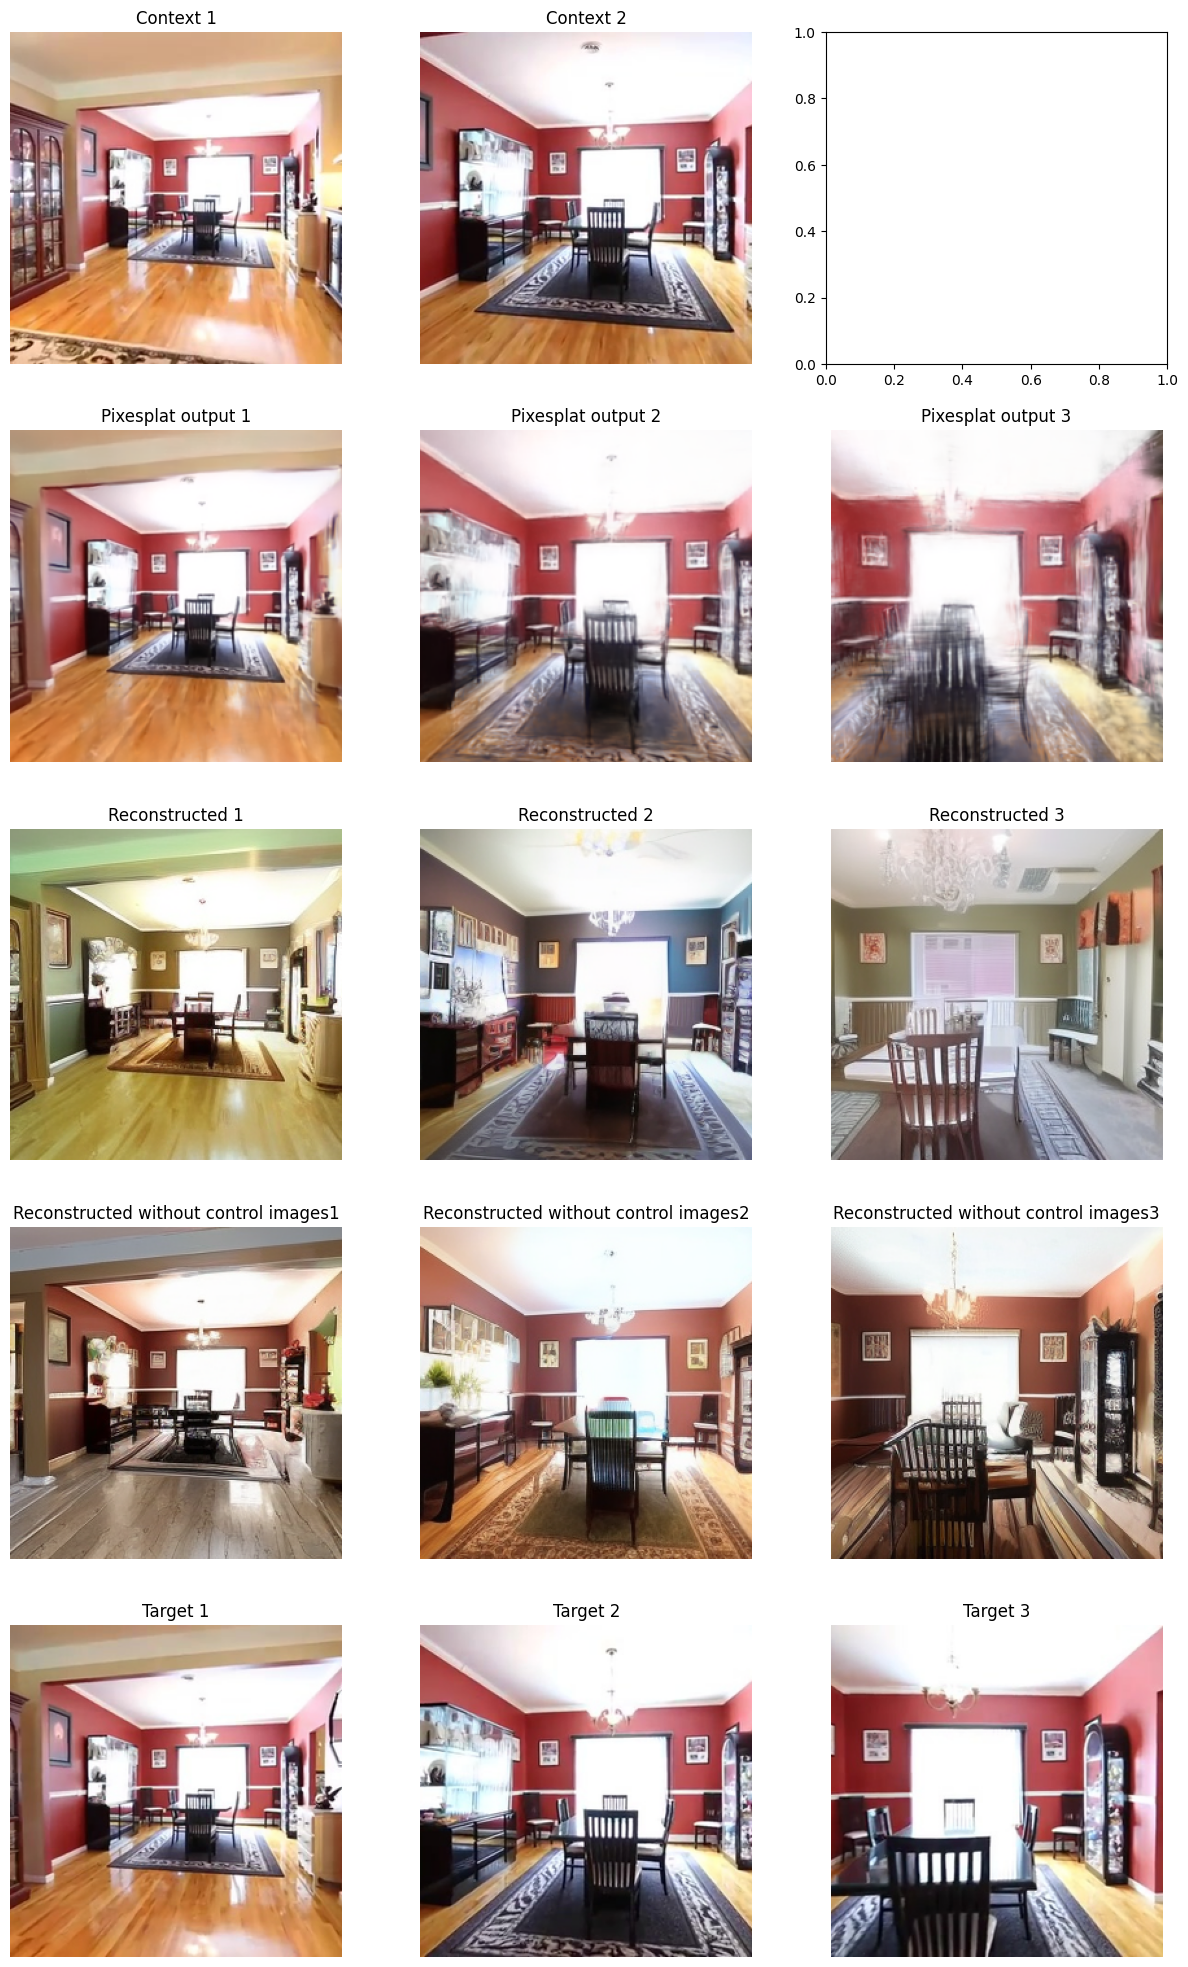

In [6]:
from pathlib import Path 
from tqdm.autonotebook import tqdm
import hashlib
from diffusers import AutoPipelineForInpainting, StableDiffusionInpaintPipeline
import torch
from PIL import Image
from pathlib import Path
import os
import numpy as np
import math
from diffusers.utils import load_image, make_image_grid
from tqdm.autonotebook import tqdm
import matplotlib.pyplot as plt

# Device cpu or cuda give major difference, also make sure you are not overfitting to the seed
generator = torch.Generator(device="cuda").manual_seed(33)

main_folder = "/teamspace/studios/this_studio/diffusion-augmented-pixelsplat/outputs/re10k_test_data/re10k/"
for sample_folder in os.listdir(main_folder):
    sample_path = os.path.join(main_folder, sample_folder)
    
    # Check if it's a directory
    if os.path.isdir(sample_path):

        context_folder = os.path.join(sample_path, "context")
        color_folder = os.path.join(sample_path, "color")
        target_folder = os.path.join(sample_path, "target")
       
        # Get the list of image files in each folder
        context_images = [os.path.join(context_folder, img) for img in os.listdir(context_folder) if img.endswith(".png")]
        color_images = [os.path.join(color_folder, img) for img in os.listdir(color_folder) if img.endswith(".png")]
        target_images = [os.path.join(target_folder, img) for img in os.listdir(target_folder) if img.endswith(".png")]
        
        print(len(context_images), len(color_images), len(target_images))
        
        # Display images using matplotlib
        fig, axes = plt.subplots(5, 3, figsize=(15, 25))
        axes = axes.flatten()

        # Display context images
        for i, img_path in enumerate(context_images):
            if i < 3:
                context_image = Image.open(img_path)
                axes[i].imshow(context_image)
                axes[i].set_title(f"Context {i+1}")
                axes[i].axis('off')
                
        # Display color images
        for i, img_path in enumerate(color_images):
            if i < 3:
                color_image = Image.open(img_path)
                axes[i+3].imshow(color_image)
                axes[i+3].set_title(f"Pixesplat output {i+1}")
                axes[i+3].axis('off')

                # Reconstruct the image using pipe function
                reconstructed_image = pipe(prompt, color_image, guidance_scale=0.0, strength=0.91, control_image=[Image.open(img_path) for img_path in color_images][i], generator=generator, num_inference_steps=30).images[0]
                axes[i+6].imshow(reconstructed_image)
                axes[i+6].set_title(f"Reconstructed {i+1}")
                axes[i+6].axis('off')

                reconstructed_image = pipe(prompt, color_image, guidance_scale=0.0, strength=0.9, generator=generator, num_inference_steps=30).images[0]
                axes[i+9].imshow(reconstructed_image)
                axes[i+9].set_title(f"Reconstructed without control images{i+1}")
                axes[i+9].axis('off')
        
        # Display target images
        for i, img_path in enumerate(target_images):
            if i < 3:
                target_image = Image.open(img_path)
                axes[i+12].imshow(target_image)
                axes[i+12].set_title(f"Target {i+1}")
                axes[i+12].axis('off')        

        plt.show()
        break
    break

  0%|          | 0/27988 [00:00<?, ?it/s]

/teamspace/studios/this_studio/diffusion-augmented-pixelsplat/outputs/re10k_test_data/re10k/000c3ab189999a83/context/000066.png
000066.png
/teamspace/studios/this_studio/diffusion-augmented-pixelsplat/outputs/re10k_test_data/re10k/000c3ab189999a83/color/000066.png


  0%|          | 0/500 [00:00<?, ?it/s]

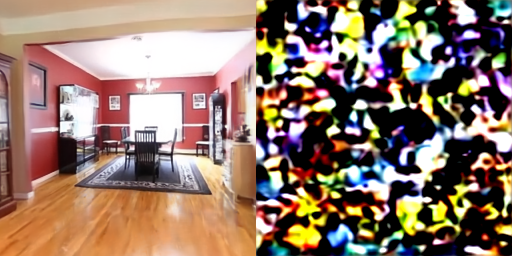

/teamspace/studios/this_studio/diffusion-augmented-pixelsplat/outputs/re10k_test_data/re10k/000c3ab189999a83/context/000176.png
000176.png
/teamspace/studios/this_studio/diffusion-augmented-pixelsplat/outputs/re10k_test_data/re10k/000c3ab189999a83/color/000176.png


  0%|          | 0/500 [00:00<?, ?it/s]

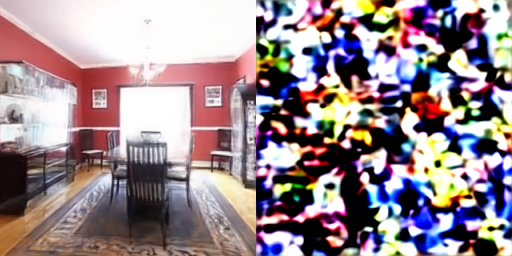

Stopping at 2 images


In [13]:
# maybe this is wrong but cell below construct poor


from pathlib import Path 
from tqdm.autonotebook import tqdm
import hashlib
from diffusers import AutoPipelineForInpainting, StableDiffusionInpaintPipeline
import torch
from PIL import Image
from pathlib import Path
import numpy as np
import math
from diffusers.utils import load_image, make_image_grid
from tqdm.autonotebook import tqdm



# pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
# pipe.to("cpu")

# Device cpu or cuda give major difference
# generator = torch.Generator(device="cpu").manual_seed(33)

prompt = ""
# prompt = ""

images_dir = Path("/teamspace/studios/this_studio/diffusion-augmented-pixelsplat/outputs/re10k_test_data/re10k/")
diff_images_dir = images_dir.with_stem("re10k_test_context_images_diff")

diff_images_dir.mkdir(exist_ok=True)

max_images = 1
num_images = 0
for image_path in tqdm(list(images_dir.glob("*/color/*.png"))):
    context_image_path = image_path.parent.parent / "context" / image_path.name
    print(context_image_path)
    output_dir = diff_images_dir / f"{pipeline_name}"
    output_dir.mkdir(exist_ok=True)
    print(image_path.name)
    image_fn = Path(image_path.name)
    print(image_path)
    image = Image.open(image_path)
    
    # These are all parameters we can change
    diffused_image = pipeline(prompt, image, height=256, width=256,
         num_inference_steps=500).images[0]
    # diffused_image = pipe(prompt, image, control_image=image, generator=generator).images[0]
    
    # display(diffused_image)
    # diffused_image = diffused_image.resize((width, height)) # FIXME this shouldn't be necessary
    # diffused_image.save(output_dir / image_fn.with_stem(image_fn.stem + f"_diffused"))
    # display(diffused_image)

    grid_img = make_image_grid([image, diffused_image], rows=1, cols=2)
    # grid_img.save(output_dir / image_fn.with_stem(image_fn.stem + f"_grid"))
    display(grid_img)

    # not sure if this is really needed
    image.close()
    diffused_image.close()
    grid_img.close()

    num_images += 1

    if max_images and num_images > max_images:
        print(f"Stopping at {num_images} images")
        break
    if max_images and num_images > max_images:
        break


  0%|          | 0/27988 [00:00<?, ?it/s]

/teamspace/studios/this_studio/diffusion-augmented-pixelsplat/outputs/re10k_test_data/re10k/000c3ab189999a83/target/000066.png


  0%|          | 0/15 [00:00<?, ?it/s]

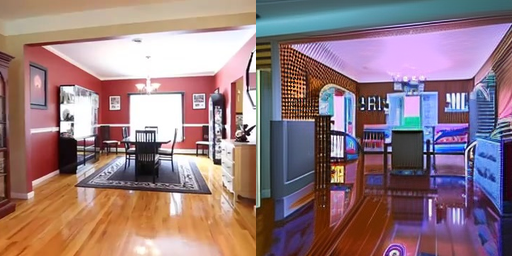

/teamspace/studios/this_studio/diffusion-augmented-pixelsplat/outputs/re10k_test_data/re10k/000c3ab189999a83/target/000176.png


  0%|          | 0/15 [00:00<?, ?it/s]

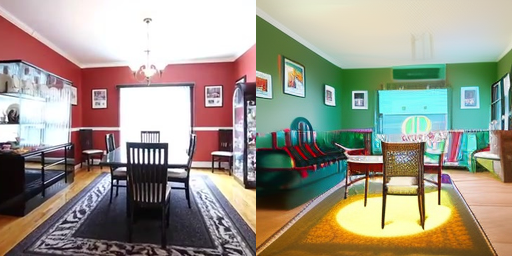

/teamspace/studios/this_studio/diffusion-augmented-pixelsplat/outputs/re10k_test_data/re10k/000c3ab189999a83/target/000241.png


  0%|          | 0/15 [00:00<?, ?it/s]

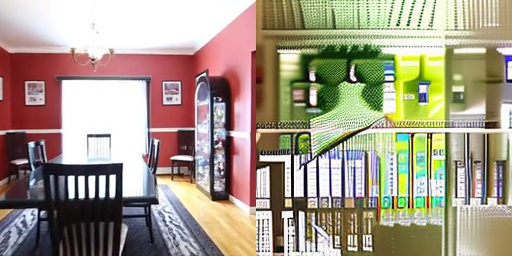

/teamspace/studios/this_studio/diffusion-augmented-pixelsplat/outputs/re10k_test_data/re10k/000db54a47bd43fe/target/000126.png


  0%|          | 0/15 [00:00<?, ?it/s]

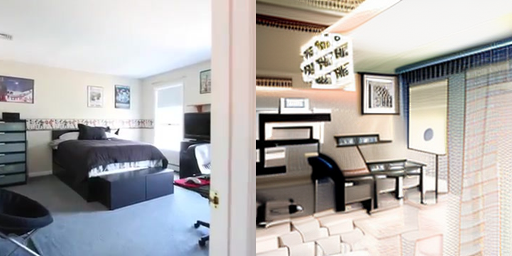

/teamspace/studios/this_studio/diffusion-augmented-pixelsplat/outputs/re10k_test_data/re10k/000db54a47bd43fe/target/000142.png


  0%|          | 0/15 [00:00<?, ?it/s]

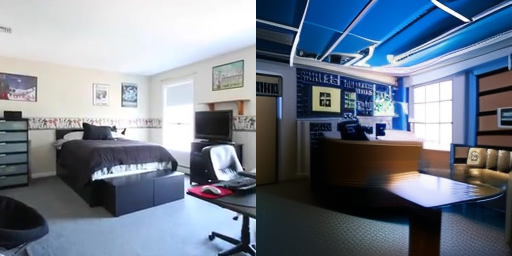

/teamspace/studios/this_studio/diffusion-augmented-pixelsplat/outputs/re10k_test_data/re10k/000db54a47bd43fe/target/000166.png


  0%|          | 0/15 [00:00<?, ?it/s]

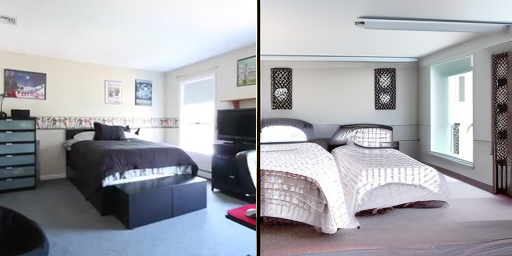

/teamspace/studios/this_studio/diffusion-augmented-pixelsplat/outputs/re10k_test_data/re10k/000db54a47bd43fe/target/000178.png


  0%|          | 0/15 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [9]:

from pathlib import Path 
from tqdm.autonotebook import tqdm
import hashlib
from diffusers import AutoPipelineForInpainting, StableDiffusionInpaintPipeline
import torch
from PIL import Image
from pathlib import Path
import numpy as np
import math
from diffusers.utils import load_image, make_image_grid
from tqdm.autonotebook import tqdm

# prompt = "The same image but fixing small physical and illumination inconsistencies"
prompt = "The same image but fixing small physical and illumination inconsistencies"

images_dir = Path("/teamspace/studios/this_studio/diffusion-augmented-pixelsplat/outputs/re10k_test_data/re10k/")
diff_images_dir = images_dir.with_stem("re10k_test_context_images_diff")

diff_images_dir.mkdir(exist_ok=True)

max_images = 20
num_images = 0
for image_path in tqdm(list(images_dir.glob("*/target/*.png"))):
    output_dir = diff_images_dir / f"{pipeline_name}"
    output_dir.mkdir(exist_ok=True)

    image_fn = Path(image_path.name)
    print(image_path)
    image = Image.open(image_path)
    # display(image)
    #image_array = np.asarray(image)
    #height, width, _ = image_array.shape
    # FIXME: little trick: do not pass the last character of the image name, so the two related images get the same mask
    
    diffused_image = pipe(
        prompt=prompt,
        image=image,
        width=256,
        height = 256, # height=height, # FIXME both width and height must be divisible by 8, but 180 isn't
        strength=1.0,
        guidance_scale=1.0,  # less emphasis on text prompt? just a guess
        controlnet_conditioning_scale=0.5,  # higher emphasis on the conditioning image? just a guess. setting it to higher than 1.0 produced garbage
        num_inference_steps=15
    ).images[0]
    # display(diffused_image)
    # diffused_image = diffused_image.resize((width, height)) # FIXME this shouldn't be necessary
    # diffused_image.save(output_dir / image_fn.with_stem(image_fn.stem + f"_diffused"))
    # display(diffused_image)

    grid_img = make_image_grid([image, diffused_image], rows=1, cols=2)
    # grid_img.save(output_dir / image_fn.with_stem(image_fn.stem + f"_grid"))
    display(grid_img)

    # not sure if this is really needed
    image.close()
    diffused_image.close()
    grid_img.close()

    num_images += 1

    if max_images and num_images > max_images:
        print(f"Stopping at {num_images} images")
        break
    if max_images and num_images > max_images:
        break

In [ ]:
 display(diffused_image)

Same code as before, but with changed params

  0%|          | 0/27988 [00:00<?, ?it/s]

/teamspace/studios/this_studio/diffusion-augmented-pixelsplat/outputs/re10k_test_data/re10k/000c3ab189999a83/context/000066.png
000066.png
/teamspace/studios/this_studio/diffusion-augmented-pixelsplat/outputs/re10k_test_data/re10k/000c3ab189999a83/color/000066.png


  0%|          | 0/20 [00:00<?, ?it/s]

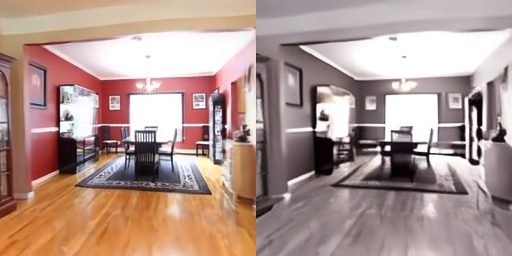

/teamspace/studios/this_studio/diffusion-augmented-pixelsplat/outputs/re10k_test_data/re10k/000c3ab189999a83/context/000176.png
000176.png
/teamspace/studios/this_studio/diffusion-augmented-pixelsplat/outputs/re10k_test_data/re10k/000c3ab189999a83/color/000176.png


  0%|          | 0/20 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [61]:
# maybe this is wrong but cell below construct poor


from pathlib import Path 
from tqdm.autonotebook import tqdm
import hashlib
from diffusers import AutoPipelineForInpainting, StableDiffusionInpaintPipeline
import torch
from PIL import Image
from pathlib import Path
import numpy as np
import math
from diffusers.utils import load_image, make_image_grid
from tqdm.autonotebook import tqdm



pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.to("cpu")

# Device cpu or cuda give major difference
generator = torch.Generator(device="cpu").manual_seed(0)

# prompt = "The same image but fixing small physical and illumination inconsistencies"
prompt = "Highly detailed and less illuminations"

images_dir = Path("/teamspace/studios/this_studio/diffusion-augmented-pixelsplat/outputs/re10k_test_data/re10k/")
diff_images_dir = images_dir.with_stem("re10k_test_context_images_diff")

diff_images_dir.mkdir(exist_ok=True)

max_images = 1
num_images = 0
for image_path in tqdm(list(images_dir.glob("*/color/*.png"))):
    context_image_path = image_path.parent.parent / "context" / image_path.name
    print(context_image_path)
    output_dir = diff_images_dir / f"{pipeline_name}"
    output_dir.mkdir(exist_ok=True)
    print(image_path.name)
    image_fn = Path(image_path.name)
    print(image_path)
    image = Image.open(image_path)
    
    # These are all parameters we can change
    diffused_image = pipe(prompt=prompt, image=image, generator=generator, strength=0.0, height=256, width=256,
        guidance_scale=0.5, num_inference_steps=20, controlnet_conditioning_scale=2.5).images[0]
    # diffused_image = pipe(prompt, image, control_image=image, generator=generator).images[0]
    #     diffused_image = pipe(
    #     prompt=prompt,
    #     image=image,
    #     width=256,
    #     height = 256, # height=height, # FIXME both width and height must be divisible by 8, but 180 isn't
    #     strength=1.0,
    #     guidance_scale=1.0,  # less emphasis on text prompt? just a guess
    #     controlnet_conditioning_scale=0.5,  # higher emphasis on the conditioning image? just a guess. setting it to higher than 1.0 produced garbage
    #     num_inference_steps=15
    # ).images[0]
    
    # display(diffused_image)
    # diffused_image = diffused_image.resize((width, height)) # FIXME this shouldn't be necessary
    # diffused_image.save(output_dir / image_fn.with_stem(image_fn.stem + f"_diffused"))
    # display(diffused_image)

    grid_img = make_image_grid([image, diffused_image], rows=1, cols=2)
    # grid_img.save(output_dir / image_fn.with_stem(image_fn.stem + f"_grid"))
    display(grid_img)

    # not sure if this is really needed
    image.close()
    diffused_image.close()
    grid_img.close()

    num_images += 1

    if max_images and num_images > max_images:
        print(f"Stopping at {num_images} images")
        break
    if max_images and num_images > max_images:
        break


In [62]:
from pathlib import Path 
from tqdm.autonotebook import tqdm
import hashlib
from diffusers import AutoPipelineForInpainting, StableDiffusionInpaintPipeline
import torch
from PIL import Image
from pathlib import Path
import numpy as np
import math
from diffusers.utils import load_image, make_image_grid
from tqdm.autonotebook import tqdm

  0%|          | 0/27988 [00:00<?, ?it/s]

/teamspace/studios/this_studio/diffusion-augmented-pixelsplat/outputs/re10k_test_data/re10k/000c3ab189999a83/target/000066.png


  0%|          | 0/20 [00:00<?, ?it/s]

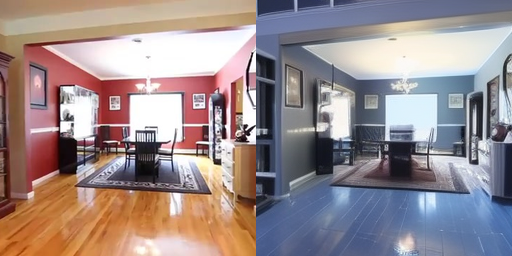

/teamspace/studios/this_studio/diffusion-augmented-pixelsplat/outputs/re10k_test_data/re10k/000c3ab189999a83/target/000176.png


  0%|          | 0/20 [00:00<?, ?it/s]

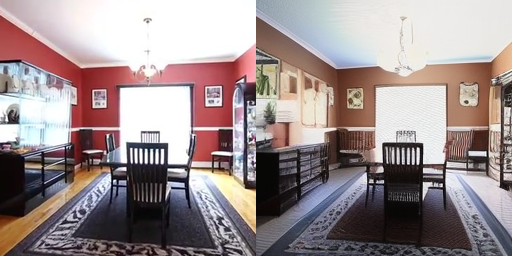

Stopping at 2 images


In [67]:
# prompt = "The same image but fixing small physical and illumination inconsistencies"
prompt = "The same image but fixing small physical and illumination inconsistencies"

images_dir = Path("/teamspace/studios/this_studio/diffusion-augmented-pixelsplat/outputs/re10k_test_data/re10k/")
diff_images_dir = images_dir.with_stem("re10k_test_context_images_diff")

diff_images_dir.mkdir(exist_ok=True)

max_images = 1
num_images = 0
for image_path in tqdm(list(images_dir.glob("*/target/*.png"))):
    output_dir = diff_images_dir / f"{pipeline_name}"
    output_dir.mkdir(exist_ok=True)

    image_fn = Path(image_path.name)
    print(image_path)
    image = Image.open(image_path)
    # display(image)
    #image_array = np.asarray(image)
    #height, width, _ = image_array.shape
    # FIXME: little trick: do not pass the last character of the image name, so the two related images get the same mask
    
    diffused_image = pipe(
        prompt=prompt,
        image=image,
        width=256,
        height = 256, # height=height, # FIXME both width and height must be divisible by 8, but 180 isn't
        strength=1.0,
        guidance_scale=1.0,  # less emphasis on text prompt? just a guess
        controlnet_conditioning_scale=1.0,  # higher emphasis on the conditioning image? just a guess. setting it to higher than 1.0 produced garbage
        num_inference_steps=20
    ).images[0]
    # display(diffused_image)
    # diffused_image = diffused_image.resize((width, height)) # FIXME this shouldn't be necessary
    # diffused_image.save(output_dir / image_fn.with_stem(image_fn.stem + f"_diffused"))
    # display(diffused_image)

    grid_img = make_image_grid([image, diffused_image], rows=1, cols=2)
    # grid_img.save(output_dir / image_fn.with_stem(image_fn.stem + f"_grid"))
    display(grid_img)

    # not sure if this is really needed
    image.close()
    diffused_image.close()
    grid_img.close()

    num_images += 1

    if max_images and num_images > max_images:
        print(f"Stopping at {num_images} images")
        break
    if max_images and num_images > max_images:
        break